# Analyzing the Impact of Wealth and Population on Olympic Success using Python

## 1. Table of Contents
(Explore sections directly by clicking on their names below)

- __[Setting Up](#2.-Setting-Up):__ Import libraries
- __[Data Pre-Processing](#3.-Data-Pre-Processing)__
- __[Exploratory Data Analysis (EDA)](#4.-Exploratory-Data-Analysis-(EDA)):__
    - [Determine the number of medals awarded by year](#Distribution-of-Medals-by-Year)
    - [Identify the top 10 countries by medal count](#Top-Countries-by-Medal-Count)
    - [Explore medal distribution by sport](#Medal-Distribution-by-Sport)
    - [Analyze the gender distribution of athletes over time](#Gender-Distribution-of-Athletes)
    - [Examine medal trends over time for selected countries](#Medal-Trends-Over-Time-for-Selected-Countries)
    - [Highlight the top 10 most successful athletes](#Most-Successful-Athletes)
    - [Explore medal distribution by season](#Medal-Distribution-by-Season)
    - [Assess the average age of medalists by sport](#Average-Age-of-Medalists-by-Sport)
    - [Explore age distribution of medalists](#Age-Distribution-of-Medalists)
- __[Comparative Analysis: Olympic Performance vs. GDP](#5.-Comparative-Analysis:-Olympic-Performance-vs.-GDP)__
- __[Predictive Modeling](#6.-Predictive-Modeling)__
- __[Conclusion](#7.-Conclusion):__
    - Project Limitations
    - Project Extension Ideas

## 2. Setting Up

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
# !pip install pycountry iso3166 country_converter

## 3. Data Pre-Processing

In [9]:
df_olympics = pd.read_csv('data/athlete_events.csv')
df_regions = pd.read_csv('data/noc_regions.csv')

In [10]:
df_olympics.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [11]:
df_regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [12]:
df_olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [13]:
df_olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [14]:
df_regions.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

In [15]:
# merge 2 datasets
df = pd.merge(df_olympics, df_regions, on='NOC', how='inner')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [16]:
# address missing values in df_olympics dataset
missing_values = df.isnull().sum()
missing_values

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
region        21
notes     265728
dtype: int64

In [17]:
missing_percentage = (missing_values / len(df)) * 100
missing_percentage

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494517
Height    22.189927
Weight    23.187833
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.310618
region     0.007756
notes     98.138990
dtype: float64

In [18]:
# null values in medal = no medal awarded
# drop notes column (> 50% missing data) + doesn't add significant value to our analysis
# remove missing values (21) in region column
df.drop(columns=['notes'], inplace=True)
df['Medal'].fillna('No', inplace=True)
df = df.dropna(subset=['region'])

df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270762,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No,Poland
270763,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No,Poland
270764,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No,Poland
270765,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No,Poland


## 4. Exploratory Data Analysis (EDA)

### Distribution of Medals by Year

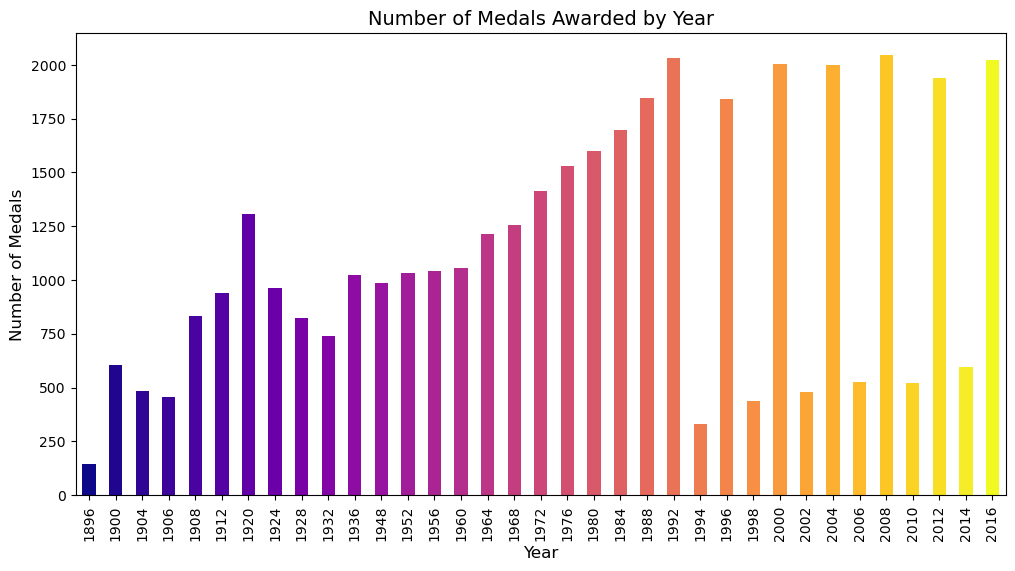

In [21]:
df_medals = df[df['Medal'] != 'No']

ax = df_medals.groupby('Year')['Medal'].count()
colors = plt.get_cmap('plasma')(np.linspace(0, 1, len(ax)))
ax.plot(kind='bar', figsize=(12,6), color=colors)

plt.title('Number of Medals Awarded by Year', fontsize=14, color='black')
plt.xlabel('Year', fontsize=12, color='black')
plt.ylabel('Number of Medals', fontsize=12, color='black')

plt.show()

- The number of medals awarded has generally increased over the years, reflecting the growth of the Olympic Games with more events and participants.
- Significant peaks in medal counts might correspond to the introduction of new sports or categories in certain years.
- The years 1994, 1998, 2002, etc., have a lower number of medals because these are years when the Winter Olympics were held.
- The Summer Olympics typically have more events and, therefore, more opportunities to award medals compared to the Winter Olympics.

### Top Countries by Medal Count

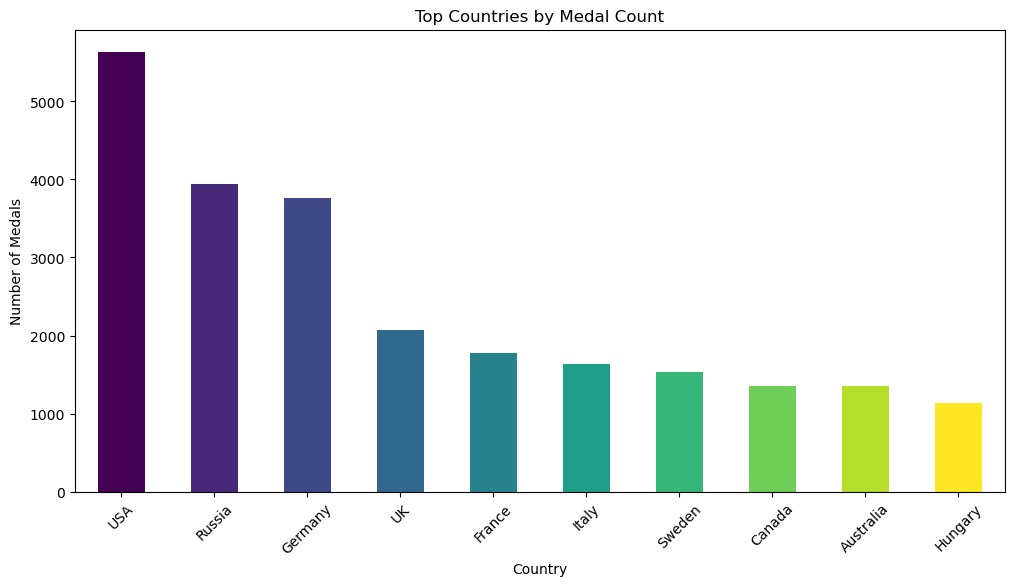

In [24]:
top_countries = df_medals.groupby('region')['Medal'].count().sort_values(ascending=False).head(10)

colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(top_countries)))
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color=colors)

plt.title('Top Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)

plt.show()

- Countries like the USA, Russia, and China dominate the top 10 list, highlighting their strong athletic programs and investment in sports.
- The distribution suggests a concentration of medals among a few countries, possibly due to their large populations and robust training facilities.

### Medal Distribution by Sport

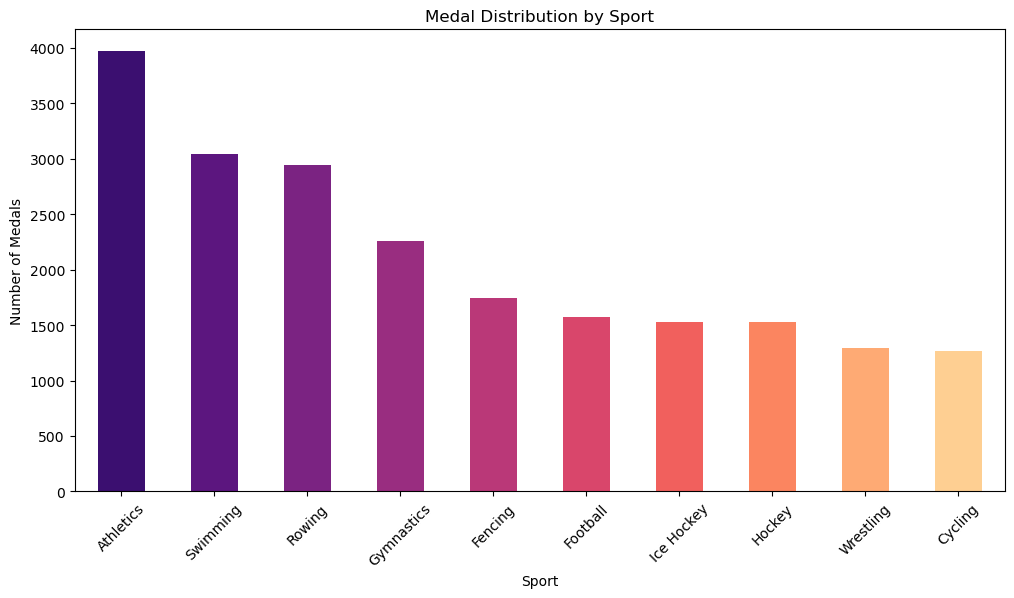

In [27]:
medals_by_sport = df_medals.groupby('Sport')['Medal'].count().sort_values(ascending=False).head(10)

colors = plt.get_cmap('magma')(np.linspace(0.2, 0.9, len(medals_by_sport)))

plt.figure(figsize=(12, 6))
medals_by_sport.plot(kind='bar', color=colors)
plt.title('Medal Distribution by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)

plt.show()

- Sports like Athletics, Swimming, and Gymnastics have more medal counts, reflecting their wide variety of events and popularity in the Olympics.
- The distribution might also reflect the historical development of certain sports and regional preferences, where some countries may dominate in specific sports due to cultural or historical reasons.

### Gender Distribution of Athletes

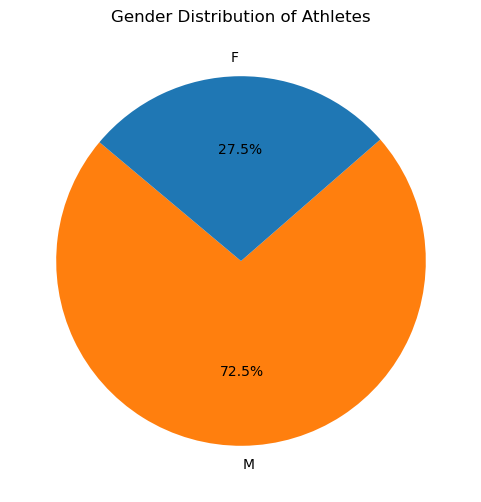

In [30]:
gender_distribution = df['Sex'].value_counts()

colors = ['#ff7f0e', '#1f77b4']

plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Gender Distribution of Athletes')
plt.show()

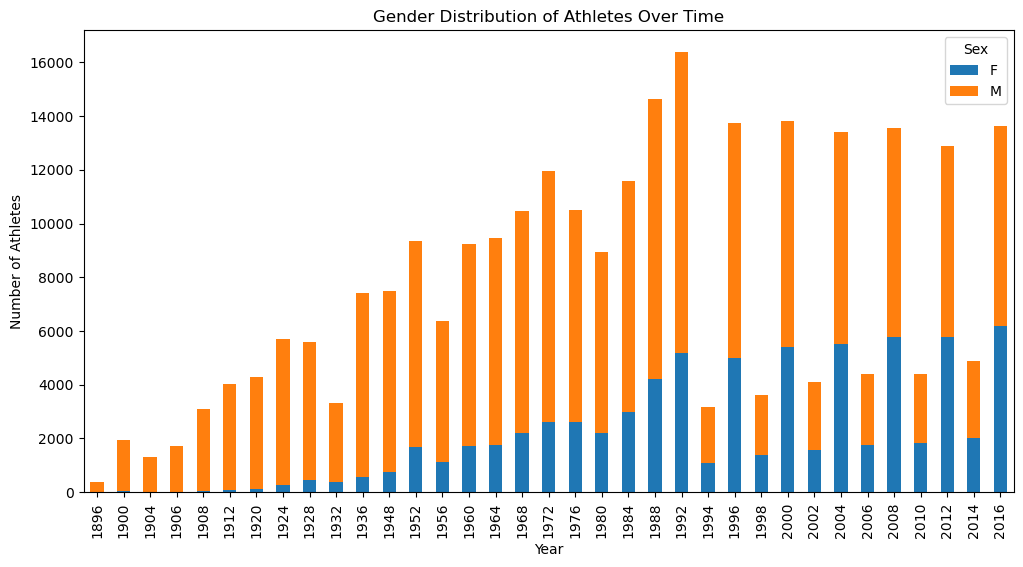

In [31]:
gender_distribution_year = df.groupby(['Year', 'Sex'])['Name'].count().unstack()
gender_distribution_year.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Gender Distribution of Athletes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.show()

- There has been a steady increase in the participation of female athletes over time, reflecting the global trend towards gender equality in sports.
- The gender gap was much larger in earlier years, indicating historical barriers to female participation in the Olympics.

### Medal Trends Over Time for Selected Countries

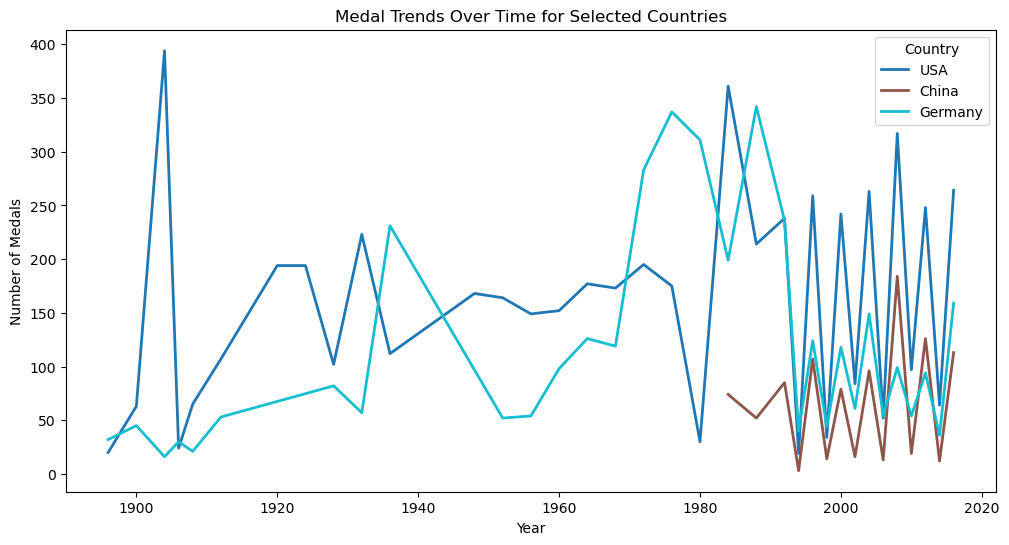

In [34]:
df_medals_count = df_medals.groupby(['Year', 'region']).size().reset_index(name='Total_Medals')

# select countries for visualization
countries = ['USA', 'China', 'Germany']

df_selected = df_medals_count[df_medals_count['region'].isin(countries)]

cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0, 1, len(countries)))

plt.figure(figsize=(12, 6))

for i, country in enumerate(countries):
    country_data = df_selected[df_selected['region'] == country]
    plt.plot(country_data['Year'], country_data['Total_Medals'], color=colors[i], label=country, linewidth=2)

plt.title('Medal Trends Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Country')
plt.show()

- The USA shows a relatively stable and high medal count trend over the years, particularly in recent decades and in the Summer Olympics.
- China exhibits a noticeable upward trend in medal counts, especially from the early 2000s onwards. This suggests successful strategic focus on various sports disciplines.
- Germany’s medal count trend shows more fluctuation compared to the USA and China. This variability might be due to changes in sports funding, athlete development programs, or even the impact of hosting the Olympics in different years.

### Most Successful Athletes

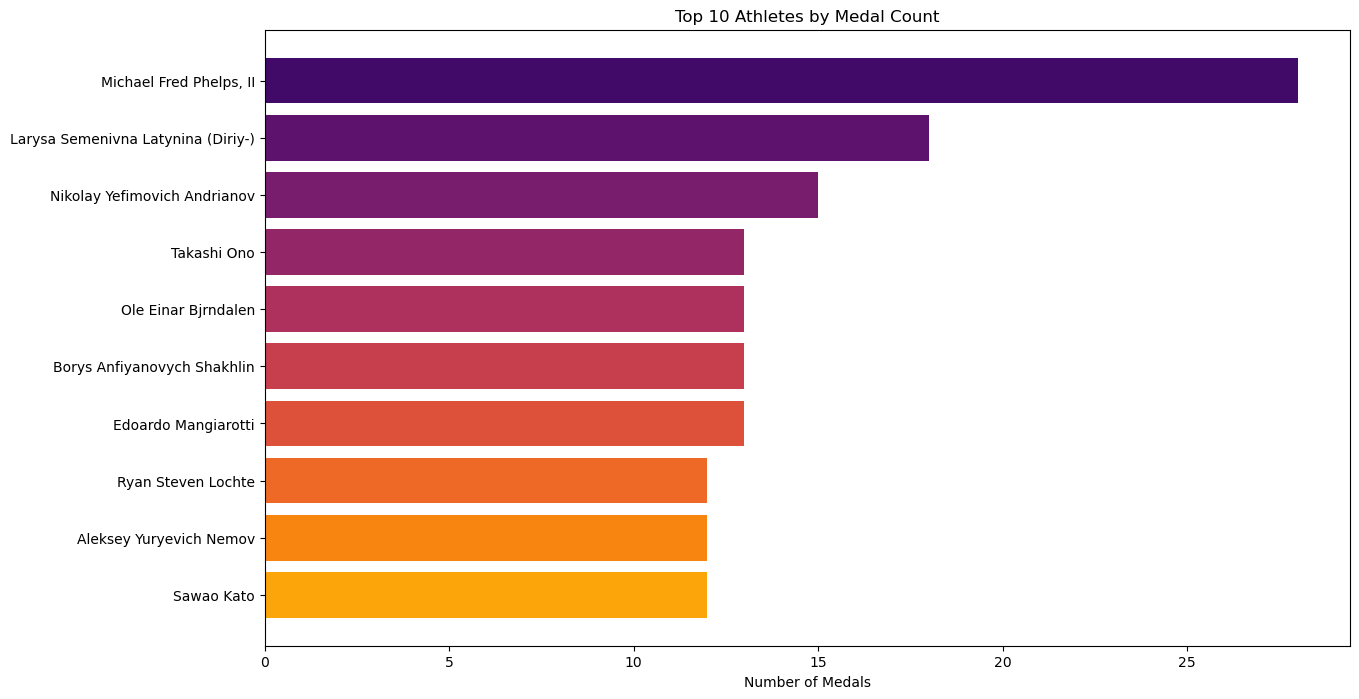

In [37]:
top_athletes = df_medals.groupby(['Name', 'region'])['Medal'].count().sort_values(ascending=False).head(10)

top_athletes_df = top_athletes.reset_index()
top_athletes_df.columns = ['Name', 'Country', 'Number of Medals']

top_athletes_df = top_athletes_df.sort_values(by='Number of Medals', ascending=True)

# bar chart
plt.figure(figsize=(14, 8))
colors = plt.get_cmap('inferno')(np.linspace(0.8, 0.2, len(top_athletes)))
bars = plt.barh(top_athletes_df['Name'], top_athletes_df['Number of Medals'], color=colors)
plt.xlabel('Number of Medals')
plt.title('Top 10 Athletes by Medal Count')

# add annotations
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='left', color='white')

plt.show()

In [38]:
top_athletes_table = df_medals.groupby(['Name', 'region'])['Medal'].value_counts().unstack().fillna(0).astype(int)
top_athletes_table['Total Medals'] = top_athletes_table.sum(axis=1)
top_athletes_sorted = top_athletes_table.sort_values(by='Total Medals', ascending=False).head(10)

top_athletes_sorted

,Medal,Bronze,Gold,Silver,Total Medals
Name,region,,,,
"Michael Fred Phelps, II",USA,2,23,3,28
Larysa Semenivna Latynina (Diriy-),Russia,4,9,5,18
Nikolay Yefimovich Andrianov,Russia,3,7,5,15
Edoardo Mangiarotti,Italy,2,6,5,13
Borys Anfiyanovych Shakhlin,Russia,2,7,4,13
Ole Einar Bjrndalen,Norway,1,8,4,13
Takashi Ono,Japan,4,5,4,13
Sawao Kato,Japan,1,8,3,12
Aleksey Yuryevich Nemov,Russia,6,4,2,12


- These top athletes have remarkable medal counts, reflecting not only their talent but also their consistency in multiple Olympic Games.
- These athletes often come from countries with strong sports programs, highlighting the importance of support systems in achieving Olympic success.

### Medal Distribution by Season

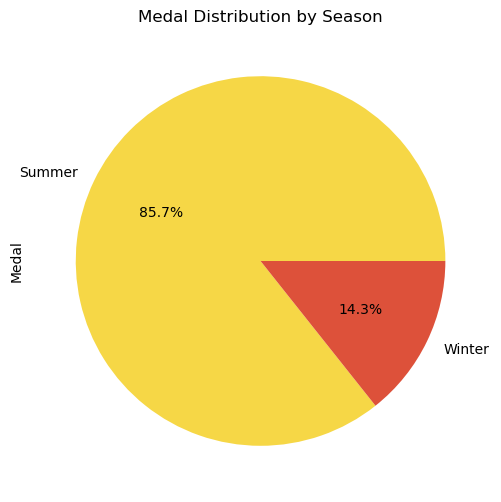

In [41]:
medals_by_season = df_medals.groupby('Season')['Medal'].count()

colors = plt.get_cmap('inferno')(np.linspace(0.9, 0.6, len(medals_by_season)))
plt.figure(figsize=(6, 6))
medals_by_season.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Medal Distribution by Season')

plt.show()

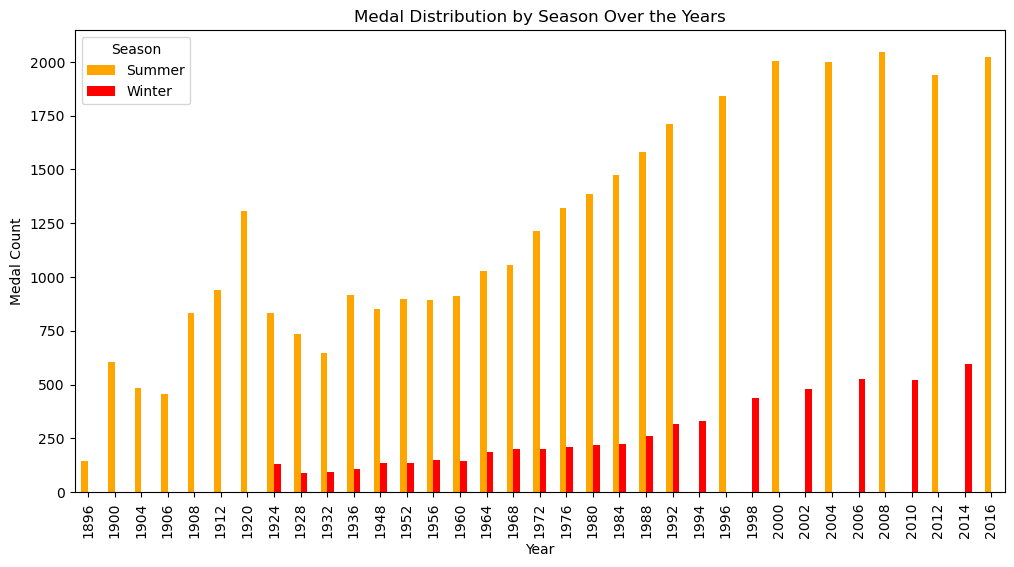

In [42]:
medals_season_year = df_medals.groupby(['Year', 'Season']).size().reset_index(name='MedalCount')

pivot_df = medals_season_year.pivot(index='Year', columns='Season', values='MedalCount')
pivot_df.plot(kind='bar', figsize=(12, 6), color=['orange', 'red'])
plt.title('Medal Distribution by Season Over the Years')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend(title='Season')
plt.show()

- The Summer Olympics consistently award a higher number of medals, which is expected given the larger number of sports and events helds compared to the Winter Olympics.
- This insight suggests that countries focusing on Winter sports may have fewer opportunities to accumulate medals.
- Medal counts in the Winter Olympics show relatively stable trends with fewer fluctuations compared to the Summer Olympics, indicating a more consistent level of competition and participation.
- Both Summer and Winter Olympics show growth over time, but the Summer Olympics’ trend is more pronounced due to the larger scale and number of events.

### Average Age of Medalists by Sport

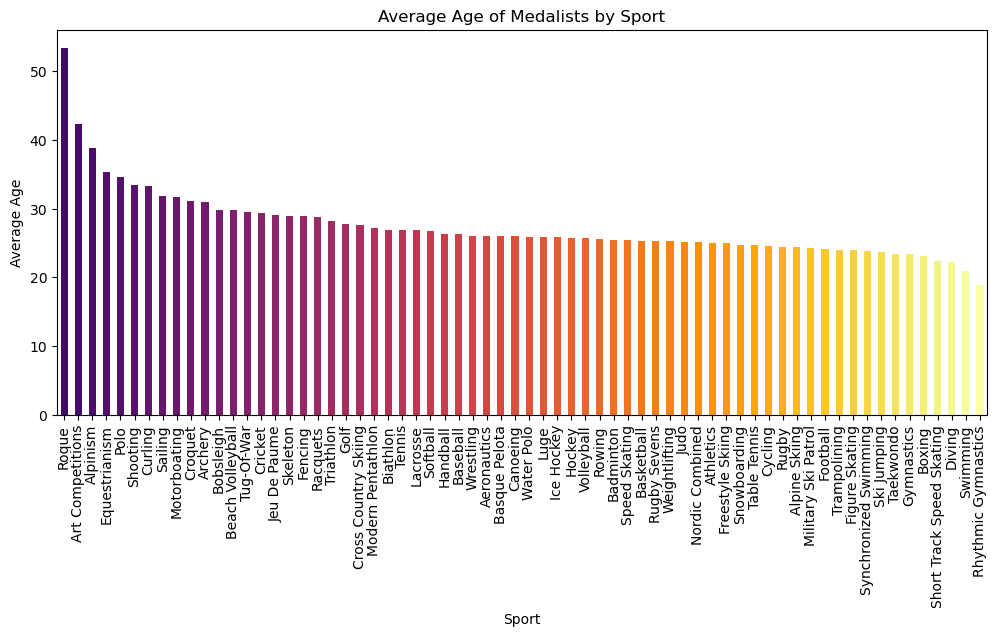

In [45]:
avg_age_by_sport = df_medals.groupby('Sport')['Age'].mean().sort_values(ascending=False)

colors = plt.get_cmap('inferno')(np.linspace(0.2, 1, len(avg_age_by_sport)))

plt.figure(figsize=(12, 5))
avg_age_by_sport.plot(kind='bar', color=colors)
plt.title('Average Age of Medalists by Sport')
plt.xlabel('Sport')
plt.ylabel('Average Age')
plt.xticks(rotation=90)
plt.show()

- Sports like Gymnastics and Swimming have lower average ages for medalists, indicating that younger athletes often peak early in these physically demanding sports.
- In contrast, sports like Equestrian or Sailing have older average medalists, suggesting that experience and strategy play a significant role in success.

### Age Distribution of Medalists

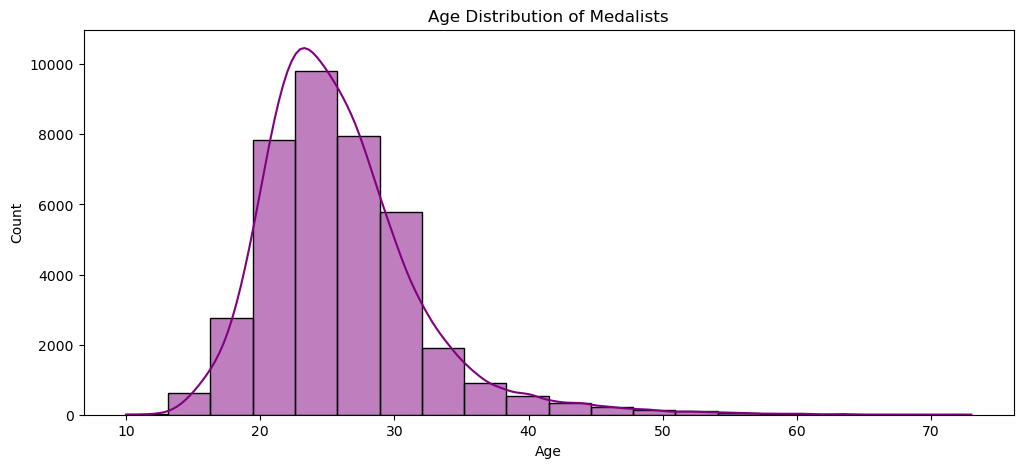

In [48]:
plt.figure(figsize=(12, 5))
sns.histplot(df_medals['Age'], kde=True, bins=20, color='purple')
plt.title('Age Distribution of Medalists')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- The data reveals that most medalists fall within the age range of 20–30 years, indicating that this age group tends to be at its peak in terms of physical performance and competitiveness.
- A noticeable number of younger athletes (under 20) also achieve medal success, particularly in sports that favor speed and agility, such as gymnastics and swimming.
- Athletes in the 30–40 age range show significant success as well, suggesting that experience and skill refinement play crucial roles in maintaining competitive performance in sports requiring strategic depth and endurance.

## 5. Comparative Analysis: Olympic Performance vs. GDP

### GDP Data Pre-Processing and Transformation

In [52]:
df_gdp = pd.read_csv('data/countries_gdp.csv')
df_gdp.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.430000e+11,9.510000e+11,9.640000e+11,9.850000e+11,9.200000e+11,8.730000e+11,9.850000e+11,1.010000e+12,1.010000e+12,9.210000e+11
1,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,6.710000e+11,7.280000e+11,8.210000e+11,8.650000e+11,7.610000e+11,6.910000e+11,6.840000e+11,7.420000e+11,7.950000e+11,7.850000e+11
2,Australia,AUS,1.860679e+10,1.968306e+10,1.992272e+10,2.153993e+10,2.380110e+10,2.597715e+10,2.730989e+10,3.044462e+10,...,1.400000e+12,1.550000e+12,1.580000e+12,1.470000e+12,1.350000e+12,1.210000e+12,1.330000e+12,1.430000e+12,1.390000e+12,1.330000e+12
3,Austria,AUT,6.592694e+09,7.311750e+09,7.756110e+09,8.374175e+09,9.169984e+09,9.994071e+09,1.088768e+10,1.157943e+10,...,4.310000e+11,4.090000e+11,4.300000e+11,4.420000e+11,3.820000e+11,3.960000e+11,4.160000e+11,4.550000e+11,4.450000e+11,4.330000e+11
4,Burundi,BDI,1.960000e+08,2.030000e+08,2.135000e+08,2.327500e+08,2.607500e+08,1.589950e+08,1.654446e+08,1.782971e+08,...,2.235821e+09,2.333308e+09,2.451625e+09,2.705783e+09,3.104395e+09,2.732809e+09,2.748180e+09,2.668496e+09,2.631434e+09,2.841786e+09


In [53]:
# convert all GDP to billions of dollars ($B) with 2 decimals
years = [str(year) for year in range(1960, 2021)]
df_gdp[years] = (df_gdp[years] / 1e9).round(2)

df_gdp.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,19.31,19.72,21.49,25.73,23.53,26.81,29.15,30.17,...,943.00,951.00,964.00,985.00,920.0,873.00,985.00,1010.00,1010.00,921.00
1,Africa Western and Central,AFW,10.40,11.13,11.94,12.68,13.84,14.86,15.83,14.43,...,671.00,728.00,821.00,865.00,761.0,691.00,684.00,742.00,795.00,785.00
2,Australia,AUS,18.61,19.68,19.92,21.54,23.80,25.98,27.31,30.44,...,1400.00,1550.00,1580.00,1470.00,1350.0,1210.00,1330.00,1430.00,1390.00,1330.00
3,Austria,AUT,6.59,7.31,7.76,8.37,9.17,9.99,10.89,11.58,...,431.00,409.00,430.00,442.00,382.0,396.00,416.00,455.00,445.00,433.00
4,Burundi,BDI,0.20,0.20,0.21,0.23,0.26,0.16,0.17,0.18,...,2.24,2.33,2.45,2.71,3.1,2.73,2.75,2.67,2.63,2.84


In [54]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  120 non-null    object 
 1   Country Code  120 non-null    object 
 2   1960          119 non-null    float64
 3   1961          120 non-null    float64
 4   1962          120 non-null    float64
 5   1963          120 non-null    float64
 6   1964          120 non-null    float64
 7   1965          120 non-null    float64
 8   1966          120 non-null    float64
 9   1967          120 non-null    float64
 10  1968          120 non-null    float64
 11  1969          120 non-null    float64
 12  1970          120 non-null    float64
 13  1971          120 non-null    float64
 14  1972          120 non-null    float64
 15  1973          120 non-null    float64
 16  1974          120 non-null    float64
 17  1975          120 non-null    float64
 18  1976          120 non-null    

In [55]:
df_gdp.isnull().sum()

Country Name    0
Country Code    0
1960            1
1961            0
1962            0
               ..
2016            0
2017            0
2018            0
2019            0
2020            0
Length: 63, dtype: int64

In [56]:
df_gdp[df_gdp.isnull().any(axis=1)]

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
106,Latin America & the Caribbean (IDA & IBRD coun...,TLA,NaN,84.14,92.11,93.7,104.0,112.0,123.0,125.0,...,5890.0,5940.0,6090.0,6210.0,5140.0,5010.0,5590.0,5460.0,5380.0,4480.0


In [57]:
# drop row with null values
df_gdp.dropna(inplace=True)

In [58]:
# dataset: number of medals won by each country per year
medals_by_country_year = df.groupby(['Year', 'region', 'NOC'])['Medal'].count().reset_index()
medals_by_country_year.columns = ['Year', 'Country', 'NOC', 'MedalCount']

medals_by_country_year

,Year,Country,NOC,MedalCount
0,1896,Australia,AUS,5
1,1896,Austria,AUT,8
2,1896,Denmark,DEN,15
3,1896,France,FRA,26
4,1896,Germany,GER,94
...,...,...,...,...
3279,2016,"Virgin Islands, British",IVB,4
3280,2016,"Virgin Islands, US",ISV,7
3281,2016,Yemen,YEM,3
3282,2016,Zambia,ZAM,7


In [59]:
# olympics and GDP datasets have different types of country codes
# convert to standard ISO codes

# match by country name only: 439 missing ISO_Code (13%)
# match by NOC only: 1323 missing ISO (40%)
# therefore match in 2 layers: first by name, then by NOC (4.7%)

from iso3166 import countries

# function to get ISO alpha-2 code by country name
def get_iso_alpha2_by_name(country_name):
    try:
        return countries.get(country_name).alpha2
    except KeyError:
        return None

# function to get ISO alpha-2 code by NOC code
def get_iso_alpha2_by_noc(noc_code):
    try:
        return countries.get(noc_code).alpha2
    except KeyError:
        return None

# match by country name first
medals_by_country_year['ISO_Code'] = medals_by_country_year['Country'].apply(get_iso_alpha2_by_name)

# find rows where country name did not return an ISO code
unmatched_by_name = medals_by_country_year[medals_by_country_year['ISO_Code'].isna()]

# match by NOC code for unmatched rows
medals_by_country_year.loc[medals_by_country_year['ISO_Code'].isna(), 'ISO_Code'] = \
medals_by_country_year.loc[medals_by_country_year['ISO_Code'].isna(), 'NOC'].apply(get_iso_alpha2_by_noc)

In [60]:
# handle rows having same ISO_Code and Year but different Country Name or NOC
def most_frequent(series):
    return series.mode().iloc[0] if not series.mode().empty else 'Unknown'

# separate rows with missing and non-missing ISO_Code
df_with_iso = medals_by_country_year[medals_by_country_year['ISO_Code'].notna()]
df_without_iso = medals_by_country_year[medals_by_country_year['ISO_Code'].isna()]

# combine rows with the same Year and ISO_Code, and get the most frequent Country and NOC
combined_medals_with_iso = df_with_iso.groupby(['ISO_Code', 'Year']).agg({
    'Country': most_frequent,
    'NOC': most_frequent,
    'MedalCount': 'sum'  # sum the medal counts
}).reset_index()

# for rows with missing ISO_Code, keep them separate or combine as needed
# in this case, we will keep them as is
combined_medals = pd.concat([combined_medals_with_iso, df_without_iso], ignore_index=True)

In [61]:
combined_medals.isnull().sum()

ISO_Code      153
Year            0
Country         0
NOC             0
MedalCount      0
dtype: int64

In [62]:
combined_medals

,ISO_Code,Year,Country,NOC,MedalCount
0,AD,1976,Andorra,AND,14
1,AD,1980,Andorra,AND,11
2,AD,1984,Andorra,AND,8
3,AD,1988,Andorra,AND,13
4,AD,1992,Andorra,AND,22
...,...,...,...,...,...
3253,None,2016,Saint Kitts,SKN,9
3254,None,2016,Saint Vincent,VIN,4
3255,None,2016,Tanzania,TAN,7
3256,None,2016,Vietnam,VIE,28


In [63]:
df_gdp_long = df_gdp.melt(id_vars=['Country Name', 'Country Code'], 
                          var_name='Year', 
                          value_name='GDP')

# convert 'year' column to integer type
df_gdp_long['Year'] = df_gdp_long['Year'].astype(int)

In [64]:
df_gdp_long

,Country Name,Country Code,Year,GDP
0,Africa Eastern and Southern,AFE,1960,19.31
1,Africa Western and Central,AFW,1960,10.40
2,Australia,AUS,1960,18.61
3,Austria,AUT,1960,6.59
4,Burundi,BDI,1960,0.20
...,...,...,...,...
7254,St. Vincent and the Grenadines,VCT,2020,0.81
7255,World,WLD,2020,84700.00
7256,South Africa,ZAF,2020,335.00
7257,Zambia,ZMB,2020,18.11


In [65]:
df_gdp_long['ISO_Code'] = df_gdp_long['Country Name'].apply(get_iso_alpha2_by_name)

# find rows where country name did not return an ISO code
unmatched_by_name_gdp = df_gdp_long[df_gdp_long['ISO_Code'].isna()]

# match by country code (NOC code) for unmatched rows
df_gdp_long.loc[df_gdp_long['ISO_Code'].isna(), 'ISO_Code'] = \
df_gdp_long.loc[df_gdp_long['ISO_Code'].isna(), 'Country Code'].apply(get_iso_alpha2_by_noc)


In [66]:
df_gdp_long.isnull().sum()

Country Name       0
Country Code       0
Year               0
GDP                0
ISO_Code        1830
dtype: int64

In [67]:
# join olympics and GDP datasets on ISO_Code (Country) and Year
# removed rows with null values (since olympics data start from 1896)
merged_df = pd.merge(combined_medals, df_gdp_long, on=['ISO_Code', 'Year'])
merged_df.drop(columns=['Country Name', 'Country Code', 'NOC'], inplace=True)
merged_df = merged_df.dropna(subset=['ISO_Code'])

merged_df

,ISO_Code,Year,Country,MedalCount,GDP
0,AT,1960,Austria,240,6.59
1,AT,1964,Austria,198,9.17
2,AT,1968,Austria,171,12.44
3,AT,1972,Austria,211,22.06
4,AT,1976,Austria,189,42.96
...,...,...,...,...,...
1289,ZW,2004,Zimbabwe,14,5.81
1290,ZW,2008,Zimbabwe,16,4.42
1291,ZW,2012,Zimbabwe,9,17.11
1292,ZW,2014,Zimbabwe,2,19.50


### Relationship between GDP and Medal Counts

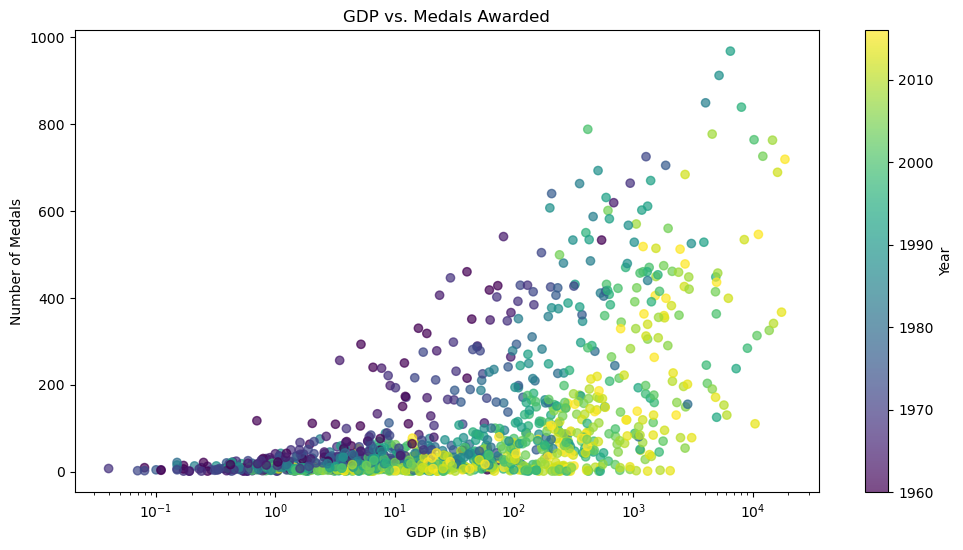

In [69]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(merged_df['GDP'], merged_df['MedalCount'], c=merged_df['Year'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Year')
plt.title('GDP vs. Medals Awarded')
plt.xlabel('GDP (in $B)')
plt.ylabel('Number of Medals')
plt.xscale('log')
plt.show()

- The scatter plot shows a positive correlation between GDP and the number of medals awarded. Generally, countries with higher GDPs tend to have higher medal counts.

- The darker colors representing older years indicate that this positive correlation is more pronounced in earlier years. This suggests that as countries’ economies have grown over time, the relationship between economic resources and Olympic success has strengthened.

## 6. Predictive Modeling

### Linear Regression (GDP vs. Medal Counts)

In [73]:
# prepare the data
X = merged_df[['GDP']]  #feature
y = merged_df['MedalCount']  #target variable

# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [75]:
# model selection - for simplicity = linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# predict on the test set
y_pred = model.predict(X_test)

In [76]:
# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse:.2f}")
print(f"Linear Regression - R² Score: {r2:.2f}")

Linear Regression - Mean Squared Error: 13825.58
Linear Regression - R² Score: 0.27


**Interpretation:**
- An MSE of 13825.58 is quite high, which indicates that there is a significant discrepancy between the predicted and actual values.
- An R² score of 0.27 means that only 27% of the variance in the number of medals can be explained by GDP.
- The high MSE and low R² score indicate that the current model (Linear Regression with GDP as the only predictor) does not capture much of the variability in medal counts, and the predictions are quite far from the actual values.

**Possible Reasons:**
- Insufficient Features: GDP alone might not be a strong predictor of medal counts. Other factors such as population size, sports infrastructure, and historical performance might also be important.
- Model Choice: Linear Regression might not be the best model for this problem. More complex models or different approaches might be needed.

**Next Steps:**
- Feature Engineering by Adding More Features: Consider incorporating additional features such as population size, sports funding, or other relevant metrics.
- Model Improvement by Trying Different Models: Experiment with other models such as random forest, or gradient boosting.

### Random Forest (GDP vs. Medal Counts)

In [81]:
# find the best max_depth parameter

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# define the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# define the parameter distribution
param_dist = {
    'max_depth': [None] + list(range(10, 101, 10))
}

# setup the randomized search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# fit the randomized search
random_search.fit(X_train, y_train)

print("Random Forest - Best max depth: ", random_search.best_params_)

Random Forest - Best max depth:  {'max_depth': 10}


In [82]:
# initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# predict on the test set
y_pred_rf = rf_model.predict(X_test)

# evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - R² Score: {r2_rf:.2f}")

Random Forest - Mean Squared Error: 14383.36
Random Forest - R² Score: 0.24


### Gradient Boosting (GDP vs. Medal Counts)

In [84]:
# find the best learning_rate parameter
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# define the model
gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)

# define the parameter distribution
param_dist = {
    'learning_rate': uniform(loc=0.01, scale=0.3)
}

# setup the randomized search
random_search = RandomizedSearchCV(estimator=gbm, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# fit the randomized search
random_search.fit(X_train, y_train)

print("Gradient Boosting - Best learning rate: ", random_search.best_params_['learning_rate'])

Gradient Boosting - Best learning rate:  0.027425083650459835


In [85]:
# find the best max_depth parameter
from scipy.stats import randint

param_distributions = {
    'max_depth': randint(3, 10)
}

gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)
random_search = RandomizedSearchCV(estimator=gbm, param_distributions=param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

best_max_depth = random_search.best_params_['max_depth']

print("Gradient Boosting - Best max depth:", best_max_depth)

Gradient Boosting - Best max depth: 4


In [86]:
# initialize and train the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.027425083650459835, max_depth=4, random_state=42)
gb_model.fit(X_train, y_train)

# predict on the test set
y_pred_gb = gb_model.predict(X_test)

# evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error: {mse_gb:.2f}")
print(f"Gradient Boosting - R² Score: {r2_gb:.2f}")

Gradient Boosting - Mean Squared Error: 12165.31
Gradient Boosting - R² Score: 0.35


**Interpretation:**

After testing linear regression, random forest, and gradient boosting models, gradient boosting achieved the highest R² and lowest MSE.

### Feature Engineering

#### Population Data Preparation and Transformation

In [90]:
df_population = pd.read_csv('data/world_population_data.csv')
df_population.sort_values('cca3')

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
197,198,ABW,Aruba,North America,106277,106445,106585,104257,100341,89101,65712,62267,59106,180.0,590,-0.16%,0.00%
35,36,AFG,Afghanistan,Asia,42239854,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230.0,65,2.70%,0.53%
41,42,AGO,Angola,Africa,36684202,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700.0,29,3.08%,0.46%
223,224,AIA,Anguilla,North America,15899,15857,15585,14525,13172,11047,8316,6560,6283,91.0,175,0.26%,0.00%
137,138,ALB,Albania,Europe,2832439,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748.0,103,-0.35%,0.04%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,WSM,Samoa,Oceania,225681,222382,214929,203571,194672,184008,168186,164905,142771,2842.0,81,1.48%,0.00%
43,44,YEM,Yemen,Asia,34449825,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968.0,65,2.24%,0.43%
23,24,ZAF,South Africa,Africa,60414495,59893885,58801927,55876504,51784921,46813266,39877570,29463549,22368306,1221037.0,50,0.87%,0.75%
62,63,ZMB,Zambia,Africa,20569737,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612.0,28,2.76%,0.26%


In [91]:
# rename columns
df_population.columns = df_population.columns.str.replace(' population', '', regex=False)

In [92]:
# convert Growth Rate column to float64
df_population['growth rate'] = df_population['growth rate'].str.rstrip('%').astype('float64') / 100

In [93]:
# convert to long format
df_population_long = pd.melt(df_population,
                             id_vars=['country', 'cca3', 'growth rate'],
                             value_vars=['2023', '2022', '2020', '2015', '2010', '2000', '1990', '1980', '1970'],
                             var_name='Year',
                             value_name='Population')

# ensure Year is of integer type
df_population_long['Year'] = df_population_long['Year'].astype(int)

In [94]:
df_population_long.sort_values(['cca3', 'Year'])

,country,cca3,growth rate,Year,Population
2069,Aruba,ABW,-0.0016,1970,59106
1835,Aruba,ABW,-0.0016,1980,62267
1601,Aruba,ABW,-0.0016,1990,65712
1367,Aruba,ABW,-0.0016,2000,89101
1133,Aruba,ABW,-0.0016,2010,100341
...,...,...,...,...,...
1009,Zimbabwe,ZWE,0.0211,2010,12839771
775,Zimbabwe,ZWE,0.0211,2015,14154937
541,Zimbabwe,ZWE,0.0211,2020,15669666
307,Zimbabwe,ZWE,0.0211,2022,16320537


In [95]:
# calculate estimated population
def estimate_population(df):
    df_estimated = pd.DataFrame(columns=df.columns)

    for _, row in df.iterrows():
        country = row['country']
        growth_rate = row['growth rate']
        year = row['Year']
        population = row['Population']

        # get the next row to calculate between
        next_row = df[(df['country'] == country) & (df['Year'] > year)].sort_values(by='Year').head(1)
        if next_row.empty:
            # if no future row exists, skip estimation
            continue

        next_year = next_row['Year'].values[0]
        next_population = next_row['Population'].values[0]

        # create a list to hold new rows
        new_rows = []

        # estimate population for the years between
        for year_est in range(year + 1, next_year):
            estimated_population = population * (1 + growth_rate) ** (year_est - year)
            new_rows.append({
                'country': country,
                'cca3': row['cca3'],
                'Year': year_est,
                'Population': estimated_population,
                'growth rate': growth_rate
            })

        # add the actual row
        new_rows.append(row)

        # convert the list of new rows to a df and concatenate
        df_estimated = pd.concat([df_estimated, pd.DataFrame(new_rows)], ignore_index=True)

    # ensure no duplicate rows in the final df
    df_estimated = df_estimated.drop_duplicates(subset=['country', 'Year'])

    return df_estimated

# apply the estimation function
df_population_estimated = estimate_population(df_population_long)

df_population_estimated.sort_values(['cca3', 'Year'])

,country,cca3,growth rate,Year,Population
12041,Aruba,ABW,-0.0016,1970,59106.0
12032,Aruba,ABW,-0.0016,1971,59011.4304
12033,Aruba,ABW,-0.0016,1972,58917.012111
12034,Aruba,ABW,-0.0016,1973,58822.744892
12035,Aruba,ABW,-0.0016,1974,58728.6285
...,...,...,...,...,...
1069,Zimbabwe,ZWE,0.0211,2018,15069983.241107
1070,Zimbabwe,ZWE,0.0211,2019,15387959.887494
381,Zimbabwe,ZWE,0.0211,2020,15669666.0
380,Zimbabwe,ZWE,0.0211,2021,16000295.9526


In [96]:
# medal counts and GDP merged data
df_merged = pd.merge(merged_df, df_population_estimated, left_on=['Country','Year'], right_on=['country','Year'], how='left')

In [97]:
df_merged.drop(columns=['country', 'cca3', 'growth rate'], inplace=True)
df_merged = df_merged.dropna(subset=['Population'])
df_merged

,ISO_Code,Year,Country,MedalCount,GDP,Population
3,AT,1972,Austria,211,22.06,7498184.456457
4,AT,1976,Austria,189,42.96,7564386.546489
5,AT,1980,Austria,158,82.06,7547561.0
6,AT,1984,Austria,235,67.99,7614199.039614
7,AT,1988,Austria,249,133.00,7681425.431985
...,...,...,...,...,...,...
1289,ZW,2004,Zimbabwe,14,5.81,12865583.193305
1290,ZW,2008,Zimbabwe,16,4.42,13986291.716296
1291,ZW,2012,Zimbabwe,9,17.11,13387325.730647
1292,ZW,2014,Zimbabwe,2,19.50,13958231.047769


### Gradient Boosting (GDP, Population Size vs. Medal Counts)

In [99]:
# define features and target
X = df_merged[['GDP', 'Population']]
y = df_merged['MedalCount']

In [100]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# initialize and train the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.027425083650459835, max_depth=4, random_state=42)
gbr.fit(X_train, y_train)

# make predictions on the test set
y_pred = gbr.predict(X_test)

# evaluate the model - calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting - Mean Squared Error: {mse:.2f}")
print(f"Gradient Boosting - R² Score: {r2:.2f}")

Gradient Boosting - Mean Squared Error: 12914.60
Gradient Boosting - R² Score: 0.31


### Feature Importance

In [103]:
# get feature importances
importances = gbr.feature_importances_

# display feature importances
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.4f}')

GDP: 0.8164
Population: 0.1836


**Interpretation:**

- After including population as a feature, the model’s predictive performance declined, reflected by higher MSE (12165.31 vs. 12914.60) and lower R² (0.35 vs. 0.31). This implies that while GDP remains a significant predictor of medal counts, population may not add substantial value to the model.

- The feature importance analysis also revealed that GDP is significantly more influential than population in predicting medal counts.

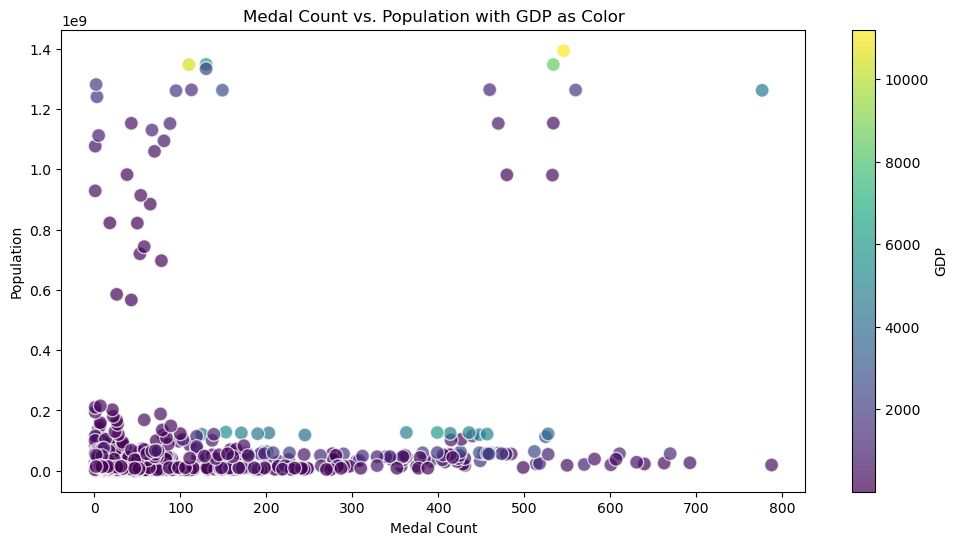

In [105]:
# visualize relationship between Population Size and Medal Counts
plt.figure(figsize=(12, 6))

scatter = plt.scatter(
    df_merged['MedalCount'], 
    df_merged['Population'], 
    c=df_merged['GDP'],
    cmap='viridis', 
    alpha=0.7, 
    edgecolors='w', 
    s=100         
)

plt.colorbar(scatter, label='GDP')

plt.title('Medal Count vs. Population with GDP as Color')
plt.xlabel('Medal Count')
plt.ylabel('Population')
plt.show()

## 7. Conclusion
This project provided several insights into medal trends and distribution, revealing key patterns in Olympic performance across different sports and countries.

- **Medal Distribution by Season:** The Summer Olympics consistently sees a higher number of medals awarded compared to the Winter Olympics, reflecting the broader range of sports and events.
- **Medal Trends Over Time:** Significant trends were observed in medal counts over the years, with fluctuations tied to different countries’ focus on sports and their changing strategies.
- **Age Distribution of Medalists:** Medalists’ ages vary, with a notable concentration of medals awarded to athletes in their late 20s to early 30s, suggesting a peak performance age in sports.
- **Medal Distribution by Sport:** Analysis shows that certain sports like Athletics, Swimming, and Gymnastics dominate the medal distribution. This possibly suggests a greater global participation in these sports.
- **Economic Influences:** This project also demonstrated that GDP is a more influential predictor of Olympic success compared to population size. This suggests that higher GDP is a better indicator of a country’s ability to achieve medals, reflecting the critical role that economic resources play in supporting and developing athletic programs and infrastructure.

### Project Limitations
- **Population Data Estimates:** Missing population data for certain years required estimation using average growth rates, which may affect the results of analyses involving population.
- **Feature Limitations:** The project was limited by the availability of additional relevant features that could further refine the predictive models.

### Project Extension Ideas
Potential ideas that can be considered to expand this project:

- **Incorporate Additional Data Sources:** Explore additional datasets, such as detailed sports infrastructure or funding data, to potentially improve predictive models.
- **Refine Model Parameters:** Further optimize models by fine-tuning parameters and exploring more advanced techniques, such as ensemble methods or deep learning.